<a href="https://colab.research.google.com/github/anishjohnson/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Import Libraries and Data.**

In [4]:
# import the libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Mount the drive.
from google.colab import drive
drive.mount('/content/drive/')

# Load the data.
df = pd.read_csv('/content/drive/MyDrive/Capstone data files/default of credit card clients_.csv', header=1)

# Create a copy of data to be on the safer side.
credit_df = df.copy()

Mounted at /content/drive/


# **Detailed Data Description:**
## **> Basic User Data.**
* **ID :** Unique ID of each client.
* **LIMIT_BAL :** Amount of the given credit (NT dollar) : it includes both the individual consumer credit and his/her family (supplementary) credit.
* **SEX :**  Gender (1 = male; 2 = female).
* **EDUCATION :** Qualifications (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* **MARRIAGE :** Marital status (1 = married; 2 = single; 3 = others).
* **AGE :** Age of the client (years)

## > **History of Past Payment.**
**Scale for PAY_0 to PAY_6 :** (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* **PAY_0 :** Repayment status in September, 2005 (scale same as above)
* **PAY_2 :** Repayment status in August, 2005 (scale same as above)
* **PAY_3 :** Repayment status in July, 2005 (scale same as above)
* **PAY_4 :** Repayment status in June, 2005 (scale same as above)
* **PAY_5 :** Repayment status in May, 2005 (scale same as above)
* **PAY_6 :** Repayment status in April, 2005 (scale same as above)

## > **Amount of Bill Statement.**
* **BILL_AMT1 :** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2 :** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3 :** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4 :** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5 :** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6 :** Amount of bill statement in April, 2005 (NT dollar)

## > **Amount of Previous Payment.**
* **PAY_AMT1 :** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2 :** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT3 :** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT4 :** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT5 :** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT6 :** Amount of previous payment in September, 2005 (NT dollar)

## >  **Response Variable.**
* **default payment next month :** Default payment (1=yes, 0=no)


# **First look at the data:**

In [6]:
# Check shape of data.
credit_df.shape

(30000, 25)

In [7]:
# Check if null values exist.
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
# Check if there are any duplicate values.
credit_df.duplicated().sum()

0

In [9]:
# First two values of the data.
credit_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [10]:
# Last two values of the data.
credit_df.tail(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [11]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


* **There are 30000 rows and 25 columns in the given data.**
* **There are no duplicate and null values present.**
* **We will have to rename few variables to understand them easily.**
* **Education has few extra values [0,5,6], we will add them into category [4] since we are only been provided with details for [1,2,3,4].**
* **Marriage also has an extra value [0], we will add it into category [3].**

***Rename few variabless.***

In [12]:
# Rename dependent variable.
credit_df.rename(columns={'default payment next month' : 'DEFAULT'}, inplace=True)

# Rename variables in History of Past Payment.
credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

# Rename variables in Amount in Bill Statement.
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

# Rename variables in Amount in Previous Payment.
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

***Replace extra values in EDUCATION.***

In [13]:
# Replace 0,5,6 with 4.
credit_df['EDUCATION'] = credit_df['EDUCATION'].replace({0:4, 5:4, 6:4})

# Check if the values are replaced.
credit_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

***Replace extra values in MARRIAGE.***

In [14]:
# Replace 0 with 3.
credit_df['MARRIAGE'] = credit_df['MARRIAGE'].replace(0,3)

# Check if the values are replaced.
credit_df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

# **Exploratory Data Analysis:**

## **Dependent Variable**: **[default payment next month]**

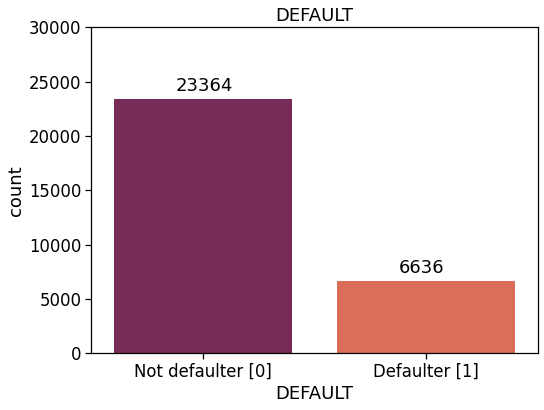

In [15]:
# Plot it.
plt.figure(figsize=(8,6))
sns.set_context('notebook', font_scale=1.5)
defaulter = sns.countplot(x = 'DEFAULT', data = credit_df, palette="rocket")
# Get count of values in each category.
for p in defaulter.patches:
   defaulter.annotate((p.get_height()), (p.get_x()+0.28, p.get_height()+800))

plt.title('DEFAULT')
plt.xticks([0,1],['Not defaulter [0]','Defaulter [1]'])
plt.ylim(0,30000)
plt.show()

**As we can see there is class imbalance in our response variable.**
> **What is class imbalance?**
* **Class imbalance is a problem in machine learning where the total number of one class of data significantly outnumbers the total number of another class of data.**
* **In our situation class 0 outnumbers class 1, i.e there are very few defaulters in the given data.**

## **Independent Variables:**

In [ ]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEFAULT'],
      dtype='object')

### **LIMIT_BAL:**

In [16]:
credit_df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

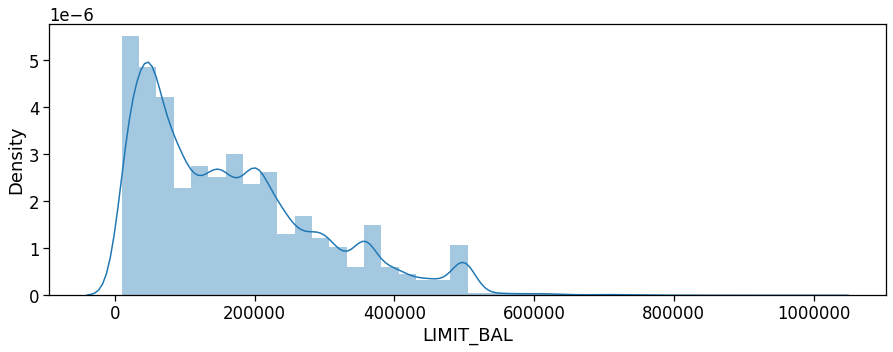

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(credit_df['LIMIT_BAL'], bins=40)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

* **LIMIT_BAL** ranges from **10000 to 1000000** with most of the values **less than or equal to 200000.**
* Lets compare these values with DEFAULT.

In [18]:
limit_bin = pd.cut(credit_df.LIMIT_BAL, [10000, 50000, 100000, 150000, 200000, 250000, 500000, 1000000])  
limit_bin.value_counts(sort=False)

(10000, 50000]       7183
(50000, 100000]      4822
(100000, 150000]     3902
(150000, 200000]     3978
(200000, 250000]     2905
(250000, 500000]     6511
(500000, 1000000]     206
Name: LIMIT_BAL, dtype: int64

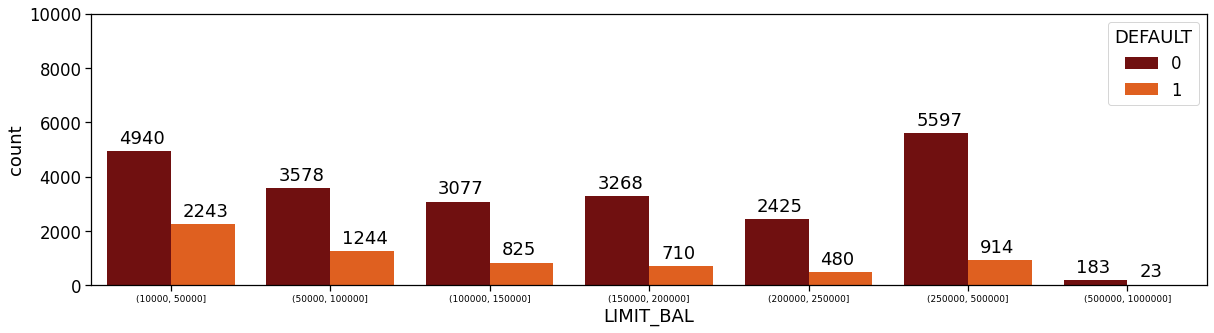

In [19]:
# Plot it.
plt.figure(figsize=(20,5))
limit_bal = sns.countplot(data=credit_df, x=limit_bin, hue='DEFAULT', palette = 'gist_heat')
plt.ylim(0,10000)
limit_bal.tick_params(axis="x", labelsize= 9)

for p in limit_bal.patches:
    limit_bal.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
plt.show()

* **Most of DEFAULTS are from users within the LIMIT of 10000 to 50000, DEFAULTS keep on descreasing as the LIMIT gets higher.**
* **This indirectly means than as the LIMIT increases the number of DEFAULTS decreases.**

### **SEX:**

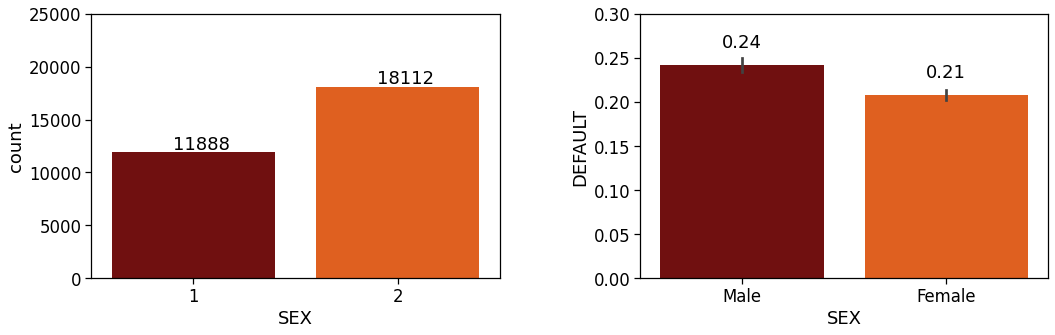

In [20]:
# SEX.
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sex = sns.countplot(credit_df.SEX, palette = 'gist_heat', ax=ax1)
for p in sex.patches:
  sex.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+250))
sex.set_ylim(0,25000)
plt.xticks([0,1], ['Male', 'Female'])

# SEX vs DEFAULT.
sex2 = sns.barplot(data = credit_df, x='SEX', y='DEFAULT', palette = 'gist_heat', ax=ax2)
for p in sex2.patches:
  sex2.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.02))
sex2.set_ylim(0,0.30)
plt.xticks([0,1], ['Male', 'Female'])
fig.tight_layout(w_pad=4)
plt.show()

* **There are more Female users compared to males, but the default rate for males are slightly higher than females.**

### **EDUCATION:**

In [21]:
credit_df.EDUCATION.unique()

array([2, 1, 3, 4])

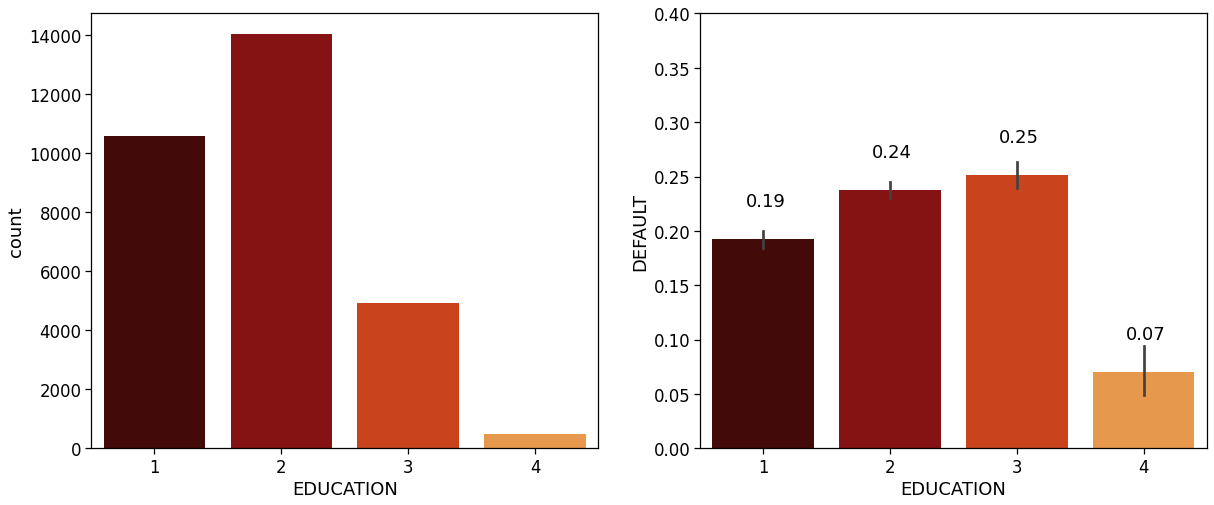

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
edu0 = sns.countplot(credit_df.EDUCATION, ax=ax1, palette='gist_heat')


edu = sns.barplot(data=credit_df, x='EDUCATION', y='DEFAULT', palette = 'gist_heat', ax=ax2)

edu.set_ylim(0, 0.4)
for p in edu.patches:
  edu.annotate("%.2f" %(p.get_height()), (p.get_x()+0.26, p.get_height()+0.03))

edu.set_xticks([0,1,2,3], ['Graduate School', 'University', 'High School', 'others'])
plt.show()

* **Maximum number of users have either gone to universities or graduated.**
* **Higher level of education lead to lower level of defaults.**
* **Others has the least level of defaults.**

### **MARRIAGE:**

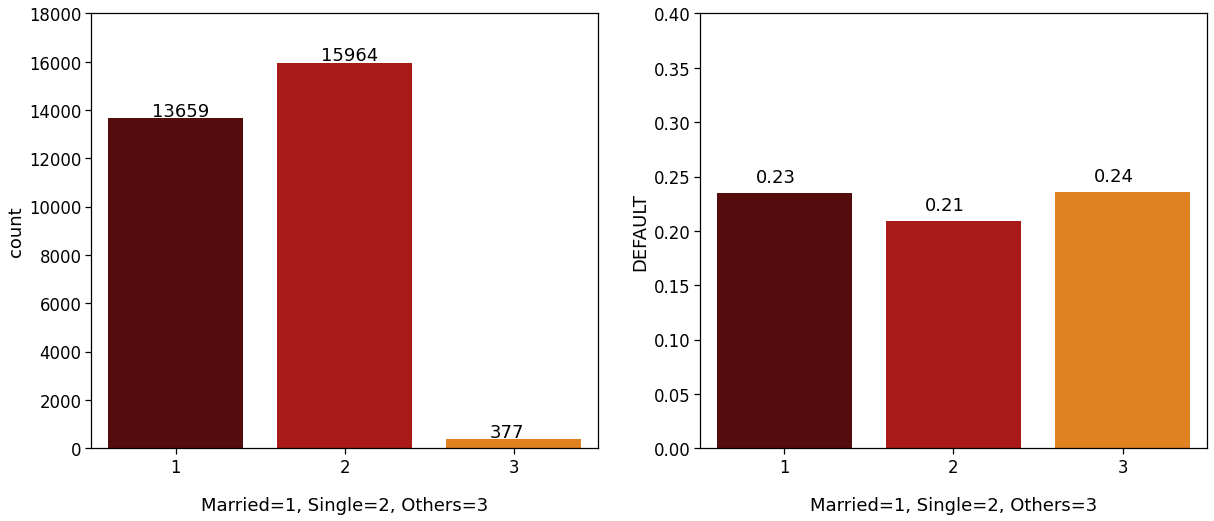

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
m1 = sns.countplot(credit_df.MARRIAGE, ax=ax1, palette='gist_heat')
m1.set_ylim(0,18000)
for p in m1.patches:
  m1.annotate((p.get_height()), (p.get_x()+0.26, p.get_height()+100))
m1.set_xlabel(xlabel='Married=1, Single=2, Others=3', labelpad=20)

# MARRIAGE vs DEFAULT.
m2 = sns.barplot(data=credit_df, x='MARRIAGE', y='DEFAULT', ax=ax2, palette='gist_heat', ci=None)
m2.set_ylim(0,0.40)
for p in m2.patches:
  m2.annotate("%.2f" %(p.get_height()), (p.get_x()+0.23, p.get_height()+0.01))
m2.set_xlabel(xlabel='Married=1, Single=2, Others=3', labelpad=20)
plt.show()

* Most of the users are either single or married.
* Among the three categories **Others** has the highest percentage of DEFAULTS followed by **Married** and **Single** users.

### **AGE:**

In [24]:
credit_df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

* **Minimum AGE of aa user is 21 and Maximum AGE is 79.**
* **Lets put them into bins and get some visuals.**

In [25]:
age_bin = pd.cut(credit_df.AGE, [20,30,40,50,60,70,80])
age_bin.value_counts()

(20, 30]    11013
(30, 40]    10713
(40, 50]     6005
(50, 60]     1997
(60, 70]      257
(70, 80]       15
Name: AGE, dtype: int64

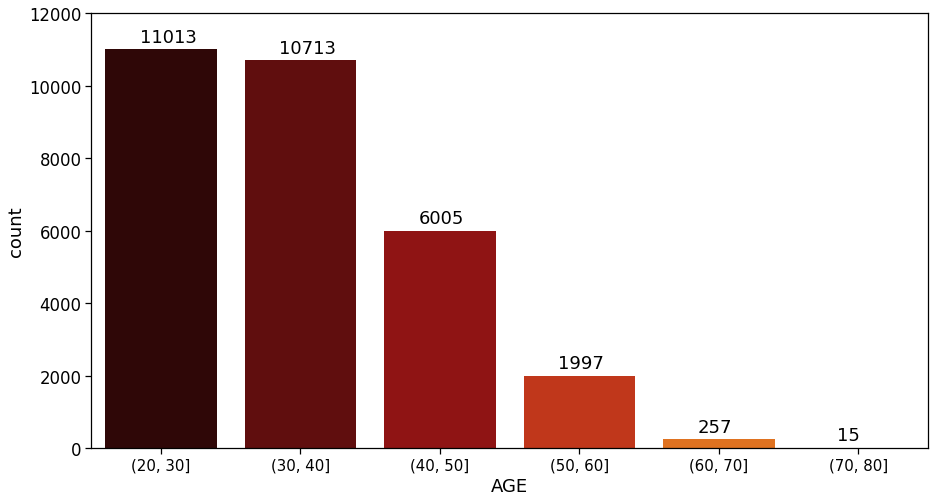

In [26]:
# Plot it.
plt.figure(figsize=(15,8))
limit_bal = sns.countplot(data=credit_df, x=age_bin, palette = 'gist_heat')
plt.ylim(0,12000)
limit_bal.tick_params(axis="x", labelsize= 15)

for p in limit_bal.patches:
    limit_bal.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+200))
plt.show()

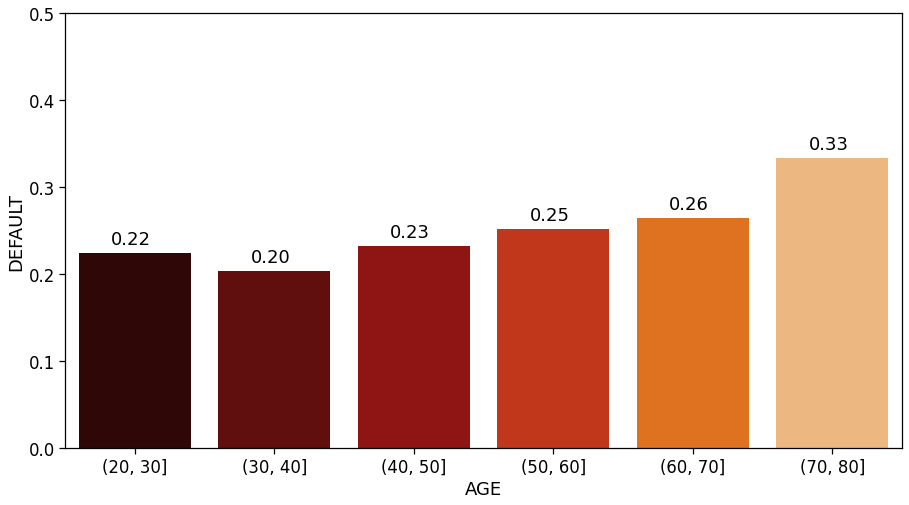

In [27]:
# AGE vs DEFAULT.
plt.figure(figsize=(15,8))
m2 = sns.barplot(data=credit_df, x=age_bin, y='DEFAULT', palette='gist_heat', ci=None)
m2.set_ylim(0,0.50)
for p in m2.patches:
  m2.annotate("%.2f" %(p.get_height()), (p.get_x()+0.23, p.get_height()+0.01))
# m2.set_xlabel(xlabel='Married=1, Single=2, Others=3', labelpad=20)
# m2
plt.show()

* **Maximum number of users are within the age group 20 t0 50.**
* **As the age increases the default rates increase, least number of are observed in the age group [30,40]**

### **History of Past Payment: [ PAY_SEPT, PAY_AUG, PAY_JUL, PAY_JUN, PAY_MAY, PAY_APR ]**

**-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above.**

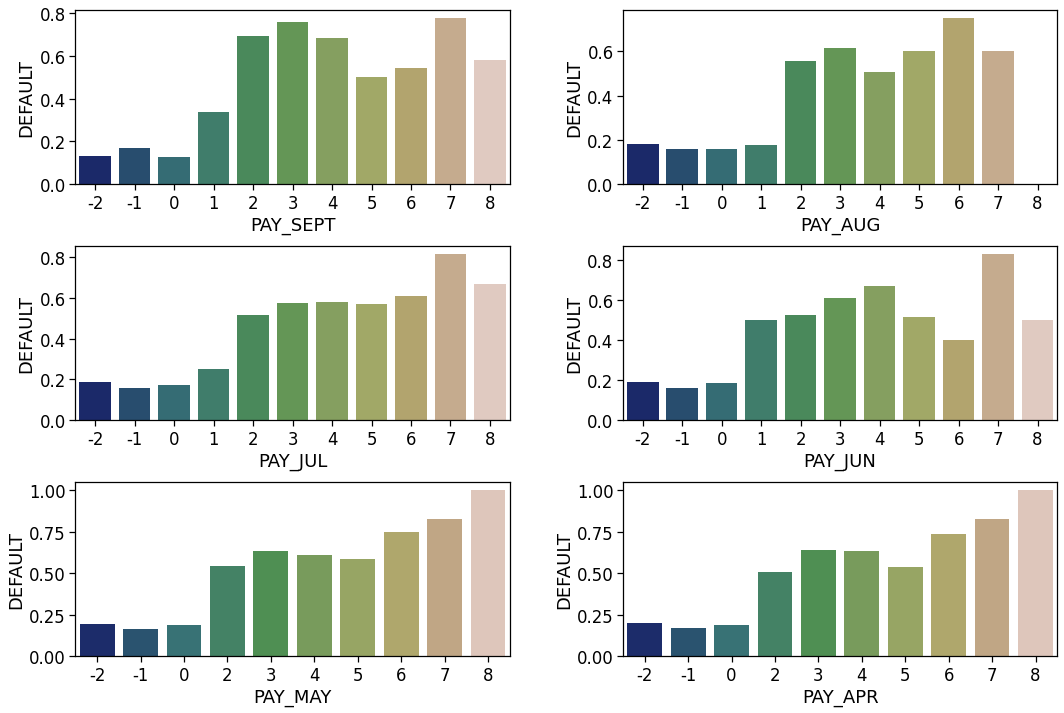

In [59]:
fig, ax = plt.subplots(3,2, figsize=(15,10))
fig.tight_layout(h_pad=1.5, w_pad=3)
sns.barplot(credit_df.PAY_SEPT,credit_df.DEFAULT, ci=None,  ax=ax[0][0], palette='gist_earth')
sns.barplot(credit_df.PAY_AUG, credit_df.DEFAULT, ci=None, ax=ax[0][1], palette='gist_earth')
sns.barplot(credit_df.PAY_JUL, credit_df.DEFAULT, ci=None, ax=ax[1][0], palette='gist_earth')
sns.barplot(credit_df.PAY_JUN, credit_df.DEFAULT, ci=None, ax=ax[1][1], palette='gist_earth')
sns.barplot(credit_df.PAY_MAY, credit_df.DEFAULT, ci=None, ax=ax[2][0], palette='gist_earth')
sns.barplot(credit_df.PAY_APR, credit_df.DEFAULT, ci=None, ax=ax[2][1], palette='gist_earth')
plt.show()

### **Amount of Bill Statement: [ BILL_AMT_SEPT,BILL_AMT_AUG, BILL_AMT_JUL, BILL_AMT_JUN, BILL_AMT_MAY,BILL_AMT_APR ]**

In [164]:
credit_df. BILL_AMT_SEPT.describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT_SEPT, dtype: float64

In [42]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


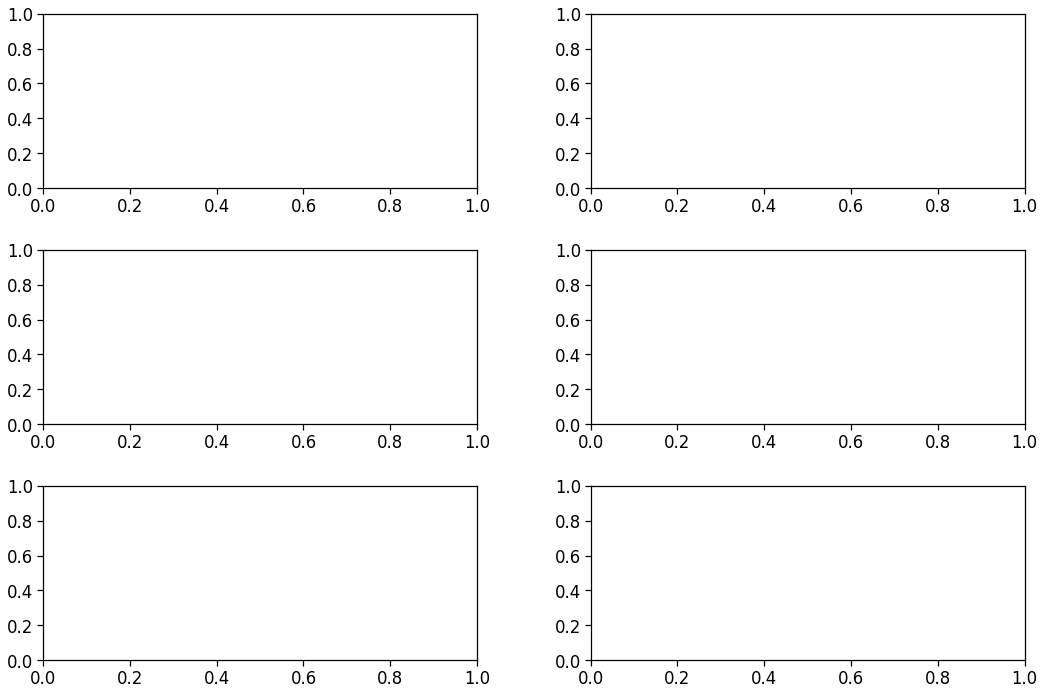

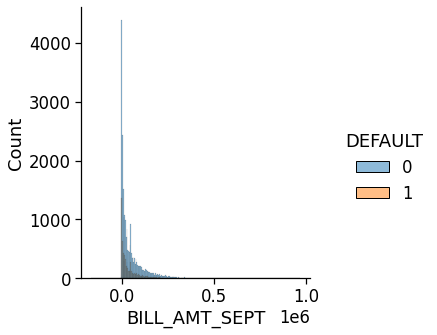

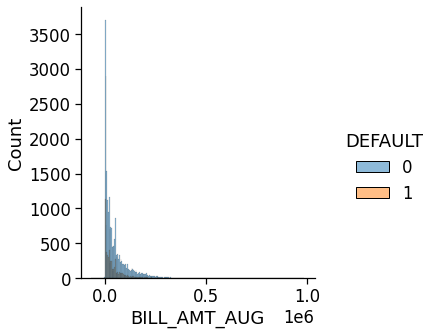

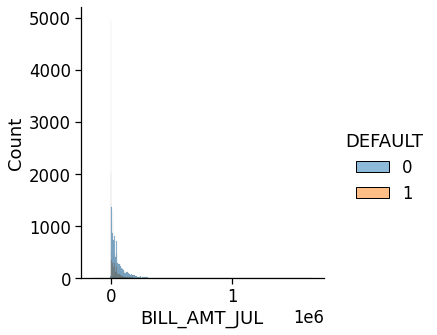

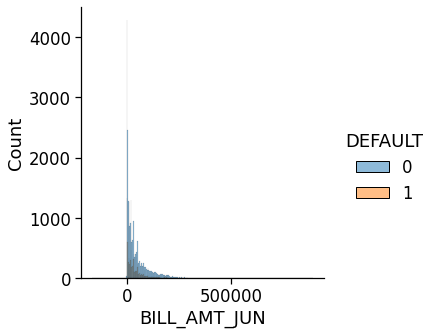

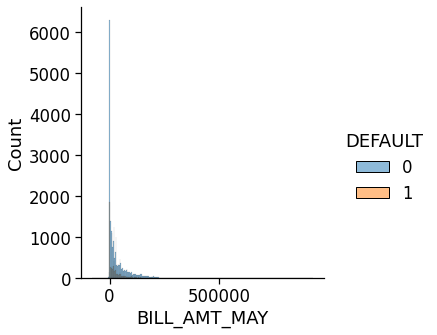

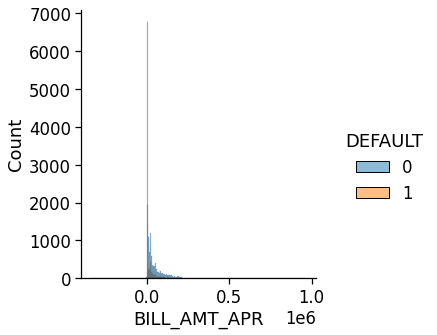

In [65]:
# amt_bill = ['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']

# sns.barplot(credit_df.BILL_AMT_SEPT,credit_df.DEFAULT, ci=None,  ax=ax[0][0], palette='gist_earth')
# sns.barplot(credit_df.BILL_AMT_AUG, credit_df.DEFAULT, ci=None, ax=ax[0][1], palette='gist_earth')
# sns.barplot(credit_df.BILL_AMT_JUL, credit_df.DEFAULT, ci=None, ax=ax[1][0], palette='gist_earth')
# sns.barplot(credit_df.BILL_AMT_JUN, credit_df.DEFAULT, ci=None, ax=ax[1][1], palette='gist_earth')
# sns.barplot(credit_df.BILL_AMT_MAY, credit_df.DEFAULT, ci=None, ax=ax[2][0], palette='gist_earth')
# sns.barplot(credit_df.BILL_AMT_APR, credit_df.DEFAULT, ci=None, ax=ax[2][1], palette='gist_earth')
fig, ax = plt.subplots(3,2, figsize=(15,10))
fig.tight_layout(h_pad=1.5, w_pad=3)
sns.displot(data=credit_df, x='BILL_AMT_SEPT',hue='DEFAULT',  ax=ax[0][0])
sns.displot(data=credit_df, x='BILL_AMT_AUG', hue='DEFAULT', ax=ax[0][1])
sns.displot(data=credit_df, x='BILL_AMT_JUL', hue='DEFAULT', ax=ax[1][0])
sns.displot(data=credit_df, x='BILL_AMT_JUN', hue='DEFAULT', ax=ax[1][1])
sns.displot(data=credit_df, x='BILL_AMT_MAY', hue='DEFAULT', ax=ax[2][0])
sns.displot(data=credit_df, x='BILL_AMT_APR', hue='DEFAULT', ax=ax[2][1])
plt.show()